In [700]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from tabulate import tabulate
from datetime import datetime, timedelta
import random

In [701]:
# Read the agedistribution_2016_estimates.csv file into a DataFrame
df_agedistribution = pd.read_csv('agedistribution_2016_estimates.csv')
df_agedistribution.head()

,Age,M,F,Tot
0,0-4,8.7,8.2,8.5
1,5-9,9.1,8.8,8.9
2,10-14,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4


In [702]:
# Rename the columns

df_agedistribution = df_agedistribution.rename(columns={
    'Age': 'Age Group',
    'M': 'Male',
    'F': 'Female',
    'Tot': 'Total'
})

df_agedistribution.head()

,Age Group,Male,Female,Total
0,0-4,8.7,8.2,8.5
1,5-9,9.1,8.8,8.9
2,10-14,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4


In [703]:
df_agedistribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age Group  21 non-null     object 
 1   Male       21 non-null     float64
 2   Female     21 non-null     float64
 3   Total      21 non-null     float64
dtypes: float64(3), object(1)
memory usage: 800.0+ bytes


In [704]:
# Handling missing values
# Check for missing values
df_agedistribution.isnull().sum()

# Fill missing values with the mean
df_agedistribution.fillna(df_agedistribution.mean(), inplace=True)

# Drop rows with missing values
df_agedistribution.dropna(inplace=True)

In [705]:
df_agedistribution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age Group  21 non-null     object 
 1   Male       21 non-null     float64
 2   Female     21 non-null     float64
 3   Total      21 non-null     float64
dtypes: float64(3), object(1)
memory usage: 840.0+ bytes


In [706]:
# Handling outliers
# Calculate z-scores for the 'Total' column
z_scores = (df_agedistribution['Total'] - df_agedistribution['Total'].mean()) / df_agedistribution['Total'].std()

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Remove outliers by filtering based on the threshold
df_agedistribution = df_agedistribution[z_scores.abs() < threshold]

In [707]:
df_agedistribution.head()

,Age Group,Male,Female,Total
0,0-4,8.7,8.2,8.5
1,5-9,9.1,8.8,8.9
2,10-14,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4


In [708]:
df_agedistribution

,Age Group,Male,Female,Total
0,0-4,8.7,8.2,8.5
1,5-9,9.1,8.8,8.9
2,10-14,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4
5,25-29,9.5,9.8,9.7
6,30-34,8.1,8.0,8.1
7,35-39,7.0,7.2,7.1
8,40-44,6.1,6.1,6.1
9,45-49,5.3,5.4,5.3


In [709]:
# Read the death_and_recovery.csv file into a DataFrame
df_death_and_recovery = pd.read_csv('death_and_recovery.csv')
df_death_and_recovery.head()

,Age,Gender,Patient_status,City,State,comorbidity,State_code
0,70,M,Deceased,Mumbai,Maharashtra,diabetes,MH
1,85,M,Deceased,Mumbai,Maharashtra,diabetes,MH
2,54,F,Recovered,Bangalore,Karnataka,cardiovascular,KA
3,65,M,Recovered,Chennai,Chennai,cerebrovascular,TN
4,55,F,Recovered,Indore,Madhya Pradesh,diabetes,MP


In [710]:
# Check the column names in the DataFrame
print(df_death_and_recovery.columns)

Index(['Age', 'Gender', 'Patient_status', 'City', 'State', 'comorbidity',
       'State_code'],
      dtype='object')


In [711]:
# Data cleaning for ""death_and_recovery"" involves removing unwanted columns from a dataset. 
# For the purposes of analysis and modelling, this enhances the quality and usability of the data.

# Drop unwanted columns
columns_to_drop = ['State_code']
df_death_and_recovery = df_death_and_recovery.drop(columns_to_drop, axis=1)

df_death_and_recovery.head()

,Age,Gender,Patient_status,City,State,comorbidity
0,70,M,Deceased,Mumbai,Maharashtra,diabetes
1,85,M,Deceased,Mumbai,Maharashtra,diabetes
2,54,F,Recovered,Bangalore,Karnataka,cardiovascular
3,65,M,Recovered,Chennai,Chennai,cerebrovascular
4,55,F,Recovered,Indore,Madhya Pradesh,diabetes


In [712]:
# Data Cleaning for 'hospital beds' is a process of renaming the appropriate columns in a dataset
# containing data. This improves the quality and usability of the data for analysis and modeling purposes.

# Read the hospitalbeds.csv file into a DataFrame
df_hospital_beds = pd.read_csv('hospitalbeds.csv')

df_hospital_beds.head()

,serial,state,Hosp_Aval,Beds_Aval,Pop_beds
0,1,Andhra Pradesh,460,37961,2230
1,2,Arunachal Pradesh,384,5010,236
2,3,Assam,1020,10179,3062
3,4,Bihar,671,13231,7846
4,5,Chhattisgarh,2023,10770,1984


In [713]:
# Rename columns
column_mapping = {
    'state': 'State',
    'serial': 'Serial_Number',
    'Hosp_Aval': 'Hospital_Availability',
    'Beds_Aval': 'Beds_Availability',
    'Pop_beds': 'Population_Beds'
}

df_hospital_beds = df_hospital_beds.rename(columns=column_mapping)

df_hospital_beds.head()

,Serial_Number,State,Hospital_Availability,Beds_Availability,Population_Beds
0,1,Andhra Pradesh,460,37961,2230
1,2,Arunachal Pradesh,384,5010,236
2,3,Assam,1020,10179,3062
3,4,Bihar,671,13231,7846
4,5,Chhattisgarh,2023,10770,1984


In [714]:
# Data cleaning for """"statewisedata"""" involves removing unwanted columns from a dataset. 
# For the purposes of analysis and modelling, this enhances the quality and usability of the data.

# Read the statewisedata.csv file into a DataFrame
df_statewisedata = pd.read_csv('statewisedata.csv')

df_statewisedata.head()

,sno,State_UT,Confirmed,Recovered,Deaths,Active,Last_updad_time,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths
0,1,Total,3210,229,86,2895,04-04-2020 14:37,TT,102,0,0
1,2,Maharashtra,537,50,26,461,04-04-2020 14:17,MH,47,0,0
2,3,Tamil Nadu,411,6,1,404,03-04-2020 17:37,TN,0,0,0
3,4,Delhi,386,8,6,372,03-04-2020 23:32,DL,0,0,0
4,5,Kerala,295,42,2,251,03-04-2020 19:07,KL,0,0,0


In [715]:
# Rename the 'State_UT' column in df_statewisedata to 'State'
df_statewisedata.rename(columns={'sno': 'Serial_Number', 'State_UT' : 'State'}, inplace=True)

# Specify the columns to be removed
unwanted_columns = ['Delta_Confirmed', 'Delta_Recovered', 'Delta_Deaths', 'State_code']

# Remove the unwanted columns
df_statewisedata = df_statewisedata.drop(unwanted_columns, axis=1)

df_statewisedata.head()

,Serial_Number,State,Confirmed,Recovered,Deaths,Active,Last_updad_time
0,1,Total,3210,229,86,2895,04-04-2020 14:37
1,2,Maharashtra,537,50,26,461,04-04-2020 14:17
2,3,Tamil Nadu,411,6,1,404,03-04-2020 17:37
3,4,Delhi,386,8,6,372,03-04-2020 23:32
4,5,Kerala,295,42,2,251,03-04-2020 19:07


In [716]:
# Display the states, gender affected and the confirmed cases in their respective 
# states where confirmed cases are more than 100.

# Rename the 'State_UT' column in df_statewisedata to 'State'
df_statewisedata.rename(columns={'State_UT': 'State', 'Last_updad_time': 'Updated_Time'}, inplace=True)

# Filter the df_statewisedata dataset for confirmed cases > 100
df_filtered_statewisedata = df_statewisedata[df_statewisedata['Confirmed'] > 100]

# Merge the filtered df_statewisedata with df_death_and_recovery on 'State' column
df_merged = pd.merge(df_filtered_statewisedata, df_death_and_recovery, on='State', how='inner')

# Select the desired columns for output: 'State', 'Gender', and 'Confirmed'
output_columns = ['State', 'Gender', 'Confirmed']
output = df_merged[output_columns]

# Drop duplicates from the output DataFrame
output = output.drop_duplicates()

# Display the output as a table
print("\n\nOutput with columns - 'State', 'Gender', and 'Confirmed':")
table = tabulate(output, headers='keys', tablefmt='psql')
print(table)



Output with columns - 'State', 'Gender', and 'Confirmed':
+----+----------------+----------+-------------+
|    | State          | Gender   |   Confirmed |
|----+----------------+----------+-------------|
|  0 | Maharashtra    | M        |         537 |
|  6 | Delhi          | F        |         386 |
|  7 | Kerala         | M        |         295 |
|  8 | Telangana      | F        |         229 |
|  9 | Rajasthan      | M        |         198 |
| 11 | Uttar Pradesh  | M        |         174 |
| 14 | Madhya Pradesh | F        |         154 |
| 17 | Karnataka      | F        |         128 |
| 19 | Gujarat        | M        |         105 |
+----+----------------+----------+-------------+


In [717]:
# Read the "icmrtestingdata" dataset
df_datewisepatients = pd.read_csv('datewisepatients.csv')
df_datewisepatients.head(1)

,Date,Status,Total,Andaman_and_Nicobar_Islands,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttarakhand,West_Bengal
0,30-Mar-20,Confirmed,208,1,2,0,0,0,5,1,...,0,3,20,0,17,7,0,24,0,1


In [718]:
# Read the "icmrtestingdata" dataset
df_icmrtestingdata = pd.read_csv('icmrtestingdata.csv')
df_icmrtestingdata.head()

,sno,UpdatedTimeStamp,TotalSamplesTested,Totalindividualstested,TotalPositiveCases,TestConductedbyPrivateLabs,Source
0,1,13/3/2020 00:00,6500.0,5900.0,78.0,NaN,Press_Release_ICMR_13March2020.pdf
1,2,18/3/2020 18:00,13125.0,12235.0,150.0,NaN,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/3/2020 10:00,13316.0,12426.0,168.0,NaN,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,19/3/2020 18:00,14175.0,13285.0,182.0,NaN,ICMR_website_update_19March_6PM_IST.pdf
4,5,20/3/2020 10:00,14376.0,13486.0,206.0,NaN,ICMR_website_update_20March_10AM_IST.pdf


In [719]:
# Rename the 'sno' column in df_icmrtestingdata to 'Serial_Number'
df_icmrtestingdata.rename(columns={'sno': 'Serial_Number'}, inplace=True)

df_icmrtestingdata

,Serial_Number,UpdatedTimeStamp,TotalSamplesTested,Totalindividualstested,TotalPositiveCases,TestConductedbyPrivateLabs,Source
0,1,13/3/2020 00:00,6500.0,5900.0,78.0,NaN,Press_Release_ICMR_13March2020.pdf
1,2,18/3/2020 18:00,13125.0,12235.0,150.0,NaN,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/3/2020 10:00,13316.0,12426.0,168.0,NaN,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,19/3/2020 18:00,14175.0,13285.0,182.0,NaN,ICMR_website_update_19March_6PM_IST.pdf
4,5,20/3/2020 10:00,14376.0,13486.0,206.0,NaN,ICMR_website_update_20March_10AM_IST.pdf
5,6,20/3/2020 18:00,15404.0,14514.0,236.0,NaN,ICMR_website_update_20March_6PM_IST.pdf
6,7,21/3/2020 10:00,15701.0,14811.0,271.0,NaN,ICMR_website_update_21March_10AM_IST.pdf
7,8,21/3/2020 18:00,16911.0,16021.0,315.0,NaN,ICMR_website_update_21March_6PM_IST.pdf
8,9,22/3/2020 10:00,16999.0,16109.0,341.0,NaN,ICMR_website_update_22March_10AM_IST.pdf
9,10,22/3/2020 18:00,18127.0,17237.0,396.0,NaN,ICMR_website_update_22March_6PM_IST.pdf


In [720]:
# Replace NaN values with mean
mean_samples = df_icmrtestingdata['TotalSamplesTested'].mean()
df_icmrtestingdata['TotalSamplesTested'].fillna(mean_samples, inplace=True)

mean_individuals = df_icmrtestingdata['Totalindividualstested'].mean()
df_icmrtestingdata['Totalindividualstested'].fillna(mean_individuals, inplace=True)

mean_cases = df_icmrtestingdata['TotalPositiveCases'].mean()
df_icmrtestingdata['TotalPositiveCases'].fillna(mean_cases, inplace=True)

# Replace NaN values in 'TestConductedbyPrivateLabs' with 0
df_icmrtestingdata['TestConductedbyPrivateLabs'].fillna(0, inplace=True)

# Add random time to 'UpdatedTimeStamp' column where entries don't match the format
for i in range(len(df_icmrtestingdata)):
    try:
        datetime.strptime(df_icmrtestingdata['UpdatedTimeStamp'][i], '%d/%m/%Y %H:%M')
    except ValueError:
        random_time = (datetime.strptime('00:00', '%H:%M') + timedelta(minutes=random.randint(0, 1439))).strftime('%H:%M')
        df_icmrtestingdata['UpdatedTimeStamp'][i] += ' ' + random_time

# Display the updated DataFrame
df_icmrtestingdata

<ipython-input-720-9991f0dffbd9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_icmrtestingdata['UpdatedTimeStamp'][i] += ' ' + random_time


,Serial_Number,UpdatedTimeStamp,TotalSamplesTested,Totalindividualstested,TotalPositiveCases,TestConductedbyPrivateLabs,Source
0,1,13/3/2020 00:00,6500.000000,5900.000000,78.000000,0.0,Press_Release_ICMR_13March2020.pdf
1,2,18/3/2020 18:00,13125.000000,12235.000000,150.000000,0.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/3/2020 10:00,13316.000000,12426.000000,168.000000,0.0,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,19/3/2020 18:00,14175.000000,13285.000000,182.000000,0.0,ICMR_website_update_19March_6PM_IST.pdf
4,5,20/3/2020 10:00,14376.000000,13486.000000,206.000000,0.0,ICMR_website_update_20March_10AM_IST.pdf
5,6,20/3/2020 18:00,15404.000000,14514.000000,236.000000,0.0,ICMR_website_update_20March_6PM_IST.pdf
6,7,21/3/2020 10:00,15701.000000,14811.000000,271.000000,0.0,ICMR_website_update_21March_10AM_IST.pdf
7,8,21/3/2020 18:00,16911.000000,16021.000000,315.000000,0.0,ICMR_website_update_21March_6PM_IST.pdf
8,9,22/3/2020 10:00,16999.000000,16109.000000,341.000000,0.0,ICMR_website_update_22March_10AM_IST.pdf
9,10,22/3/2020 18:00,18127.000000,17237.000000,396.000000,0.0,ICMR_website_update_22March_6PM_IST.pdf


In [721]:
# Display the states which collected more than 1000 samples in day.

# Merge the datasets based on the "Serial_Number" column
merged_data = pd.merge(df_icmrtestingdata, df_statewisedata, on='Serial_Number')

# Filter the states with more than 1000 samples tested
filtered_data = merged_data[merged_data['TotalSamplesTested'] > 1000]

# Display the relevant columns
result = filtered_data[['Serial_Number', 'State', 'TotalSamplesTested']]

print(result)

    Serial_Number                        State  TotalSamplesTested
0               1                        Total         6500.000000
1               2                  Maharashtra        13125.000000
2               3                   Tamil Nadu        13316.000000
3               4                        Delhi        14175.000000
4               5                       Kerala        14376.000000
5               6                    Telangana        15404.000000
6               7                    Rajasthan        15701.000000
7               8                Uttar Pradesh        16911.000000
8               9               Andhra Pradesh        16999.000000
9              10               Madhya Pradesh        18127.000000
10             11                    Karnataka        18383.000000
11             12                      Gujarat        20707.000000
12             13            Jammu and Kashmir        20864.000000
13             14                      Haryana        22694.00

In [722]:
# Display the patient status in each state from the death_and_recovery table

# Perform self-join based on the 'State' column
result = pd.merge(df_death_and_recovery[['Patient_status', 'City', 'Age', 'State']],
                  df_death_and_recovery[['State']].drop_duplicates(),
                  on='State')

# Display the patient status in each state
print(result)

   Patient_status        City  Age              State
0        Deceased      Mumbai   70        Maharashtra
1        Deceased      Mumbai   85        Maharashtra
2       Recovered       Thane   45        Maharashtra
3       Recovered        Pune   57        Maharashtra
4        Deceased      Mumbai   51        Maharashtra
5        Deceased     Dharavi   56        Maharashtra
6       Recovered   Bangalore   54          Karnataka
7       Recovered      Mysore   74          Karnataka
8       Recovered     Chennai   65            Chennai
9       Recovered      Indore   55     Madhya Pradesh
10       Deceased      Indore   49     Madhya Pradesh
11       Deceased      Bhopal   40     Madhya Pradesh
12      Recovered     Udaipur   20          Rajasthan
13       Deceased      Jaipur   54          Rajasthan
14      Recovered       Delhi   21              Delhi
15      Recovered       Kochi   30             Kerala
16       Deceased      Howrah   57        West Bengal
17       Deceased   Belghori

In [723]:
# Display the hospital beds along with their location where patients have recovered from covid-19 and 
# those beds are made available to the needy patients waiting in the queue to get admitted.

# Merge the death_and_recovery and hospital_beds dataframes based on the State column
merged_data = pd.merge(df_death_and_recovery, df_hospital_beds, on='State')

# Filter the merged data to show patients who have recovered and beds available
recovered_and_available = merged_data[(merged_data['Patient_status'] == 'Recovered') & (merged_data['Beds_Availability'] > 0)]

# Select the relevant columns: Patient_status, State, City, and Beds_Availability
result = recovered_and_available[['Patient_status', 'State', 'City', 'Beds_Availability']]

# Display the result
print(result)

   Patient_status           State        City  Beds_Availability
2       Recovered     Maharashtra       Thane              47217
3       Recovered     Maharashtra        Pune              47217
6       Recovered       Karnataka   Bangalore              51986
7       Recovered       Karnataka      Mysore              51986
8       Recovered  Madhya Pradesh      Indore              30302
11      Recovered       Rajasthan     Udaipur              38617
13      Recovered           Delhi       Delhi              22961
14      Recovered          Kerala       Kochi              37021
17      Recovered     West Bengal    Siliguri              77210
18      Recovered     West Bengal     Gangtok              77210
19      Recovered     West Bengal  Darjeeling              77210
22      Recovered   Uttar Pradesh     Lucknow              56384
23      Recovered          Punjab    Amritsar              11419
24      Recovered           Assam    Guwahati              10179
25      Recovered        

In [724]:
# Function to display all tables 
def display_tables():
    # Display tables
    print("df_agedistribution \n",df_agedistribution.columns.tolist(),
          "\n \n df_death_and_recovery \n", df_death_and_recovery.columns.tolist(),
          "\n \n df_hospital_beds \n", df_hospital_beds.columns.tolist(),
          "\n \n df_statewisedata \n", df_statewisedata.columns.tolist(),
          "\n \n df_icmrtestingdata \n", df_icmrtestingdata.columns.tolist(),
          "\n \n df_datewisepatients \n",df_datewisepatients.columns.tolist())
    
# Call the function to display tables
display_tables()

df_agedistribution 
 ['Age Group', 'Male', 'Female', 'Total'] 
 
 df_death_and_recovery 
 ['Age', 'Gender', 'Patient_status', 'City', 'State', 'comorbidity'] 
 
 df_hospital_beds 
 ['Serial_Number', 'State', 'Hospital_Availability', 'Beds_Availability', 'Population_Beds'] 
 
 df_statewisedata 
 ['Serial_Number', 'State', 'Confirmed', 'Recovered', 'Deaths', 'Active', 'Updated_Time'] 
 
 df_icmrtestingdata 
 ['Serial_Number', 'UpdatedTimeStamp', 'TotalSamplesTested', 'Totalindividualstested', 'TotalPositiveCases', 'TestConductedbyPrivateLabs', 'Source'] 
 
 df_datewisepatients 
 ['Date', 'Status', 'Total', 'Andaman_and_Nicobar_Islands', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra_Nagar_Have', 'Daman_And_Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Jharkand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Pud

In [725]:
# Display the total number of people in assam who have recovered

# Filter the death_and_recovery dataset for Assam
assam_data = df_death_and_recovery[df_death_and_recovery['State'] == 'Assam']

# Count the total number of people who have recovered in Assam
recovered_count = assam_data[assam_data['Patient_status'] == 'Recovered'].shape[0]

# Calculate the total number of people who are not recovered
not_recovered_count = assam_data[assam_data['Patient_status'] != 'Recovered'].shape[0]

print("Patients recovered", recovered_count, "\nPatients not recovered", not_recovered_count)

Patients recovered 2 
Patients not recovered 0


Filtered Data:
+----+-----------------+---------------------+-------------------------+---------------------+-------------------+
|    |   Serial_Number | State               |   Hospital_Availability |   Beds_Availability |   Population_Beds |
|----+-----------------+---------------------+-------------------------+---------------------+-------------------|
| 21 |              22 | Rajasthan           |                    2512 |               38617 |              1777 |
|  4 |               5 | Chhattisgarh        |                    2023 |               10770 |              1984 |
| 23 |              24 | Tamil Nadu          |                    1995 |               62229 |              1203 |
|  9 |              10 | Jammu +ACY- Kashmir |                    1969 |                7318 |              1733 |
| 19 |              20 | Orissa              |                    1750 |               16683 |              2514 |
| 27 |              28 | West Bengal         |                   

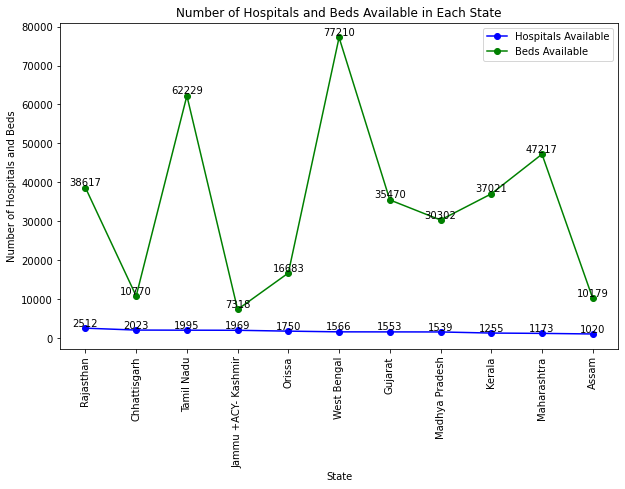

In [726]:
# Show the state, hospitals and beds available where beds and hospitals available are more than 1000.

# Filter the hospitalbeds DataFrame
filtered_df = df_hospital_beds[(df_hospital_beds['Hospital_Availability'] > 1000) & 
                               (df_hospital_beds['Beds_Availability'] > 1000) & 
                               (df_hospital_beds['State'] != 'India')]

# Sort the filtered data by hospitals available in descending order
sorted_df = filtered_df.sort_values('Hospital_Availability', ascending=False)

# Print the filtered DataFrame as a table
print("Filtered Data:")
table = tabulate(sorted_df, headers='keys', tablefmt='psql')
print(table)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line chart
plt.plot(sorted_df['State'], sorted_df['Hospital_Availability'], marker='o', color='blue', label='Hospitals Available')
plt.plot(sorted_df['State'], sorted_df['Beds_Availability'], marker='o', color='green', label='Beds Available')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Number of Hospitals and Beds')
plt.title('Number of Hospitals and Beds Available in Each State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add data values on every point
for x, y in zip(sorted_df['State'], sorted_df['Hospital_Availability']):
    plt.text(x, y, str(y), ha='center', va='bottom')

for x, y in zip(sorted_df['State'], sorted_df['Beds_Availability']):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Add legend
plt.legend()

# Display the line chart
plt.show()

In [727]:
# Show states where active cases are less than 50
# Filter the statewisedata DataFrame
filtered_df = df_statewisedata[df_statewisedata['Active'] < 50]

# Print the states where active cases are less than 50
print("States with Active Cases less than 50:")
print(filtered_df['State'].to_string(index=False))

States with Active Cases less than 50:
                     Haryana
                 West Bengal
                       Bihar
                       Assam
                      Odisha
                  Chandigarh
                 Uttarakhand
                      Ladakh
 Andaman and Nicobar Islands
                Chhattisgarh
            Himachal Pradesh
                         Goa
                  Puducherry
                   Jharkhand
                     Manipur
                     Mizoram
           Arunachal Pradesh
      Dadra and Nagar Haveli
               Daman and Diu
                 Lakshadweep
                   Meghalaya
                    Nagaland
                      Sikkim
                     Tripura


In [728]:
# Show the dates when the beds are available

# Perform a cross-join to create a Cartesian product
merged_df = df_datewisepatients.assign(key=1).merge(df_hospital_beds.assign(key=1), on='key').drop('key', axis=1)

# Filter the merged dataset to include only the rows where beds are available
filtered_df = merged_df[(merged_df['Beds_Availability'] > 0) & (merged_df['State'] != 'India')]

# Select the required columns for display
output_df = filtered_df[['Date', 'State', 'Beds_Availability']]

# Remove duplicate rows
output_df = output_df.drop_duplicates()

# Convert the output dataframe to a list of lists
table_data = output_df.values.tolist()

# Define the table headers
table_headers = ['Date', 'State', 'Beds Available']

# Print the dates when beds are available with state and numbers in a table format
print("Dates when Beds are Available with State and Numbers:")
print(tabulate(table_data, headers=table_headers, tablefmt='grid'))

Dates when Beds are Available with State and Numbers:
+-----------+------------------------------------+------------------+
| Date      | State                              |   Beds Available |
+===========+====================================+==================+
| 30-Mar-20 | Andhra Pradesh                     |            37961 |
+-----------+------------------------------------+------------------+
| 30-Mar-20 | Arunachal Pradesh                  |             5010 |
+-----------+------------------------------------+------------------+
| 30-Mar-20 | Assam                              |            10179 |
+-----------+------------------------------------+------------------+
| 30-Mar-20 | Bihar                              |            13231 |
+-----------+------------------------------------+------------------+
| 30-Mar-20 | Chhattisgarh                       |            10770 |
+-----------+------------------------------------+------------------+
| 30-Mar-20 | Goa                   

In [729]:
display_tables()

df_agedistribution 
 ['Age Group', 'Male', 'Female', 'Total'] 
 
 df_death_and_recovery 
 ['Age', 'Gender', 'Patient_status', 'City', 'State', 'comorbidity'] 
 
 df_hospital_beds 
 ['Serial_Number', 'State', 'Hospital_Availability', 'Beds_Availability', 'Population_Beds'] 
 
 df_statewisedata 
 ['Serial_Number', 'State', 'Confirmed', 'Recovered', 'Deaths', 'Active', 'Updated_Time'] 
 
 df_icmrtestingdata 
 ['Serial_Number', 'UpdatedTimeStamp', 'TotalSamplesTested', 'Totalindividualstested', 'TotalPositiveCases', 'TestConductedbyPrivateLabs', 'Source'] 
 
 df_datewisepatients 
 ['Date', 'Status', 'Total', 'Andaman_and_Nicobar_Islands', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra_Nagar_Have', 'Daman_And_Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Jharkand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Pud

In [730]:
# Show the details of the number of samples tested across each timestamp

# Select the required columns from the icmrtestingdata DataFrame
samples_tested_df = df_icmrtestingdata[['UpdatedTimeStamp', 'TotalSamplesTested']]

# Print the details of the number of samples tested across each timestamp
print("Details of Number of Samples Tested:")
print(samples_tested_df)

Details of Number of Samples Tested:
   UpdatedTimeStamp  TotalSamplesTested
0   13/3/2020 00:00         6500.000000
1   18/3/2020 18:00        13125.000000
2   19/3/2020 10:00        13316.000000
3   19/3/2020 18:00        14175.000000
4   20/3/2020 10:00        14376.000000
5   20/3/2020 18:00        15404.000000
6   21/3/2020 10:00        15701.000000
7   21/3/2020 18:00        16911.000000
8   22/3/2020 10:00        16999.000000
9   22/3/2020 18:00        18127.000000
10  23/3/2020 10:00        18383.000000
11  23/3/2020 20:00        20707.000000
12  24/3/2020 10:00        20864.000000
13  24/3/2020 20:00        22694.000000
14  25/3/2020 10:00        22928.000000
15  25/3/2020 20:00        25144.000000
16  26/3/2020 10:00        26695.608696
17  26/3/2020 18:00        26695.608696
18  27/3/2020 09:00        27688.000000
19  30/3/2020 21:06        38442.000000
20  31/3/2020 20:06        42788.000000
21   1/4/2020 04:35        47951.000000
22   2/4/2020 21:00        55851.000000
23 

In [731]:
# Display the number of males and females who have recovered

# Filter the DataFrame to include only the recovered patients
recovered_df = df_death_and_recovery[df_death_and_recovery['Patient_status'] == 'Recovered']

# Calculate the count of males and females
males_recovered = (recovered_df['Gender'] == 'M').sum()
females_recovered = (recovered_df['Gender'] == 'F').sum()

# Display the count of males and females who have recovered
print("Number of males recovered:", males_recovered)
print("Number of females recovered:", females_recovered)

Number of males recovered: 10
Number of females recovered: 11


In [732]:
display_tables()

df_agedistribution 
 ['Age Group', 'Male', 'Female', 'Total'] 
 
 df_death_and_recovery 
 ['Age', 'Gender', 'Patient_status', 'City', 'State', 'comorbidity'] 
 
 df_hospital_beds 
 ['Serial_Number', 'State', 'Hospital_Availability', 'Beds_Availability', 'Population_Beds'] 
 
 df_statewisedata 
 ['Serial_Number', 'State', 'Confirmed', 'Recovered', 'Deaths', 'Active', 'Updated_Time'] 
 
 df_icmrtestingdata 
 ['Serial_Number', 'UpdatedTimeStamp', 'TotalSamplesTested', 'Totalindividualstested', 'TotalPositiveCases', 'TestConductedbyPrivateLabs', 'Source'] 
 
 df_datewisepatients 
 ['Date', 'Status', 'Total', 'Andaman_and_Nicobar_Islands', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra_Nagar_Have', 'Daman_And_Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Jharkand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Pud

In [733]:
# List the states where the population is greater than the number of beds available in descending order of serial number

# Filter the DataFrame to include only the states where population is greater than beds available
filtered_df = df_hospital_beds[df_hospital_beds['Population_Beds'] > df_hospital_beds['Beds_Availability']]

# Sort the filtered DataFrame in descending order based on the 'Serial_Number' column
sorted_df = filtered_df.sort_values('Serial_Number', ascending=False)

# Retrieve the 'State' and 'Beds_Availability' columns from the sorted DataFrame
result = sorted_df[['State', 'Population_Beds', 'Beds_Availability']]

# Display the result
print(result)

                       State  Population_Beds  Beds_Availability
33               Lakshadweep              533                120
31           Daman +ACY- Diu             1215                200
30  Dadra +ACY- Nagar Haveli             1221                281
17                   Mizoram             1132               1064
10                 Jharkhand             6089               5414


In [734]:
# Find out the Patients who tested negative after collection of samples

# Create a new column for the difference between 'TotalSamplesTested' and 'TotalPositiveCases'
df_icmrtestingdata['TotalNegativeCases'] = df_icmrtestingdata['TotalSamplesTested'] - df_icmrtestingdata['TotalPositiveCases']

# Retrieve the 'TotalSamplesTested', 'TotalPositiveCases', and 'TotalNegativeCases' columns
result = df_icmrtestingdata[['TotalSamplesTested', 'TotalPositiveCases', 'TotalNegativeCases']]

# Display the result
print(result)

    TotalSamplesTested  TotalPositiveCases  TotalNegativeCases
0          6500.000000           78.000000         6422.000000
1         13125.000000          150.000000        12975.000000
2         13316.000000          168.000000        13148.000000
3         14175.000000          182.000000        13993.000000
4         14376.000000          206.000000        14170.000000
5         15404.000000          236.000000        15168.000000
6         15701.000000          271.000000        15430.000000
7         16911.000000          315.000000        16596.000000
8         16999.000000          341.000000        16658.000000
9         18127.000000          396.000000        17731.000000
10        18383.000000          415.000000        17968.000000
11        20707.000000          471.000000        20236.000000
12        20864.000000          482.000000        20382.000000
13        22694.000000          536.000000        22158.000000
14        22928.000000          539.000000        22389

In [735]:
# Perform a self-join on the 'State' column to find the number of hospital beds available in each state

# Retrieve the 'Beds_Availability' and 'State' columns from the 'df_hospital_beds' DataFrame
result = df_hospital_beds[['Beds_Availability', 'State']]

# Display the result
print(result)

    Beds_Availability                               State
0               37961                      Andhra Pradesh
1                5010                   Arunachal Pradesh
2               10179                               Assam
3               13231                               Bihar
4               10770                        Chhattisgarh
5                2510                                 Goa
6               35470                             Gujarat
7                7879                             Haryana
8                8485                    Himachal Pradesh
9                7318                 Jammu +ACY- Kashmir
10               5414                           Jharkhand
11              51986                           Karnataka
12              37021                              Kerala
13              30302                      Madhya Pradesh
14              47217                         Maharashtra
15               1385                             Manipur
16            

In [736]:
display_tables()

df_agedistribution 
 ['Age Group', 'Male', 'Female', 'Total'] 
 
 df_death_and_recovery 
 ['Age', 'Gender', 'Patient_status', 'City', 'State', 'comorbidity'] 
 
 df_hospital_beds 
 ['Serial_Number', 'State', 'Hospital_Availability', 'Beds_Availability', 'Population_Beds'] 
 
 df_statewisedata 
 ['Serial_Number', 'State', 'Confirmed', 'Recovered', 'Deaths', 'Active', 'Updated_Time'] 
 
 df_icmrtestingdata 
 ['Serial_Number', 'UpdatedTimeStamp', 'TotalSamplesTested', 'Totalindividualstested', 'TotalPositiveCases', 'TestConductedbyPrivateLabs', 'Source', 'TotalNegativeCases'] 
 
 df_datewisepatients 
 ['Date', 'Status', 'Total', 'Andaman_and_Nicobar_Islands', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra_Nagar_Have', 'Daman_And_Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Jharkand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nag

In [737]:
# Display the total number of beds available in Tamil Nadu

# Filter the 'df_hospital_beds' DataFrame for Tamil Nadu
tamil_nadu_beds = df_hospital_beds[df_hospital_beds['State'] == 'Tamil Nadu']

# Calculate the total number of beds available in Tamil Nadu
total_beds_tamil_nadu = tamil_nadu_beds['Beds_Availability'].sum()

# Display the total number of beds available in Tamil Nadu
print("Total beds available in Tamil Nadu:", total_beds_tamil_nadu)

Total beds available in Tamil Nadu: 62229


In [738]:
# Display total beds and hospitals available in India

# Filter the DataFrame to exclude the entry for India
df_hospital_beds_filtered = df_hospital_beds[df_hospital_beds['State'] != 'India']

# Calculate the total number of beds available in India
total_beds_india = df_hospital_beds_filtered['Beds_Availability'].sum()

# Calculate the total number of hospitals available in India
total_hospitals_india = df_hospital_beds_filtered['Hospital_Availability'].sum()

# Display the total number of beds and hospitals available in India
print("Total beds available in India:", total_beds_india)
print("Total hospitals available in India:", total_hospitals_india)

Total beds available in India: 622628
Total hospitals available in India: 23916


In [739]:
display_tables()

df_agedistribution 
 ['Age Group', 'Male', 'Female', 'Total'] 
 
 df_death_and_recovery 
 ['Age', 'Gender', 'Patient_status', 'City', 'State', 'comorbidity'] 
 
 df_hospital_beds 
 ['Serial_Number', 'State', 'Hospital_Availability', 'Beds_Availability', 'Population_Beds'] 
 
 df_statewisedata 
 ['Serial_Number', 'State', 'Confirmed', 'Recovered', 'Deaths', 'Active', 'Updated_Time'] 
 
 df_icmrtestingdata 
 ['Serial_Number', 'UpdatedTimeStamp', 'TotalSamplesTested', 'Totalindividualstested', 'TotalPositiveCases', 'TestConductedbyPrivateLabs', 'Source', 'TotalNegativeCases'] 
 
 df_datewisepatients 
 ['Date', 'Status', 'Total', 'Andaman_and_Nicobar_Islands', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra_Nagar_Have', 'Daman_And_Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Jharkand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nag

In [740]:
# Display the total confirmed cases till 31-March in Maharashtra

# Convert 'Last_updad_time' column to datetime
df_statewisedata['Updated_Time'] = pd.to_datetime(df_statewisedata['Updated_Time'])

# Filter data for Maharashtra and till 31-March
filtered_data = df_statewisedata[(df_statewisedata['State'] == 'Maharashtra') & 
                                 (df_statewisedata['Updated_Time'].dt.strftime('%Y-%m-%d') <= '2022-03-31')]

# Retrieve the total confirmed cases
total_confirmed_cases = filtered_data['Confirmed'].sum()

print("Total Confirmed Cases in Maharashtra till 31-March:", total_confirmed_cases)

Total Confirmed Cases in Maharashtra till 31-March: 537


In [741]:
# Display the total percentage of male and female being affected by covid-19 ranging between ‘0-50’

# Filter the age range '0-50' from the DataFrame
age_range_0_50 = df_agedistribution[df_agedistribution['Age Group'].isin(['0-4', '5-9', '10-14', '15-19', '20-24', 
                                                                          '25-29', '30-34', '35-39', '40-44', '45-49', 
                                                                          '0-14'])]

# Calculate the total males and females in the age range '0-50'
total_males = age_range_0_50['Male'].sum()
total_females = age_range_0_50['Female'].sum()

# Calculate the percentage of males and females
percentage_males = (total_males / (total_males + total_females)) * 100
percentage_females = (total_females / (total_males + total_females)) * 100

# Display the results
print("Total percentage of males affected by COVID-19 in the age range 0-50:", percentage_males)
print("Total percentage of females affected by COVID-19 in the age range 0-50:", percentage_females)

Total percentage of males affected by COVID-19 in the age range 0-50: 50.428506991429856
Total percentage of females affected by COVID-19 in the age range 0-50: 49.571493008570144


In [742]:
display_tables()

df_agedistribution 
 ['Age Group', 'Male', 'Female', 'Total'] 
 
 df_death_and_recovery 
 ['Age', 'Gender', 'Patient_status', 'City', 'State', 'comorbidity'] 
 
 df_hospital_beds 
 ['Serial_Number', 'State', 'Hospital_Availability', 'Beds_Availability', 'Population_Beds'] 
 
 df_statewisedata 
 ['Serial_Number', 'State', 'Confirmed', 'Recovered', 'Deaths', 'Active', 'Updated_Time'] 
 
 df_icmrtestingdata 
 ['Serial_Number', 'UpdatedTimeStamp', 'TotalSamplesTested', 'Totalindividualstested', 'TotalPositiveCases', 'TestConductedbyPrivateLabs', 'Source', 'TotalNegativeCases'] 
 
 df_datewisepatients 
 ['Date', 'Status', 'Total', 'Andaman_and_Nicobar_Islands', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra_Nagar_Have', 'Daman_And_Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Jharkand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nag

In [743]:
# Calculate the recovery rate (recovered cases / confirmed cases) for each state
df_statewisedata['Recovery_Rate'] = df_statewisedata['Recovered'] / df_statewisedata['Confirmed']

# Display the state, number of recovered cases, number of active cases, and recovery rate
recovery_data = df_statewisedata[['State', 'Recovered', 'Active', 'Recovery_Rate']]

print(recovery_data)

                          State  Recovered  Active  Recovery_Rate
0                         Total        229    2895       0.071340
1                   Maharashtra         50     461       0.093110
2                    Tamil Nadu          6     404       0.014599
3                         Delhi          8     372       0.020725
4                        Kerala         42     251       0.142373
5                     Telangana         32     186       0.139738
6                     Rajasthan          3     195       0.015152
7                 Uttar Pradesh         17     155       0.097701
8                Andhra Pradesh          2     177       0.011111
9                Madhya Pradesh          0     146       0.000000
10                    Karnataka         11     113       0.085938
11                      Gujarat         10      86       0.095238
12            Jammu and Kashmir          3      73       0.038462
13                      Haryana         27      31       0.465517
14        

In [744]:
# Display the states along with the ratio of Beds available against the total population beds

# Remove the entry for 'India' from the DataFrame
df_hospital_beds = df_hospital_beds[df_hospital_beds['State'] != 'India']

# Calculate the ratio of beds available against the total population beds
df_hospital_beds['Bed_Ratio'] = df_hospital_beds['Beds_Availability'] / df_hospital_beds['Population_Beds']

# Display the state and bed ratio
bed_ratio_data = df_hospital_beds[['State', 'Bed_Ratio']]

print(bed_ratio_data)

                                 State   Bed_Ratio
0                       Andhra Pradesh   17.022870
1                    Arunachal Pradesh   21.228814
2                                Assam    3.324298
3                                Bihar    1.686337
4                         Chhattisgarh    5.428427
5                                  Goa    4.320138
6                              Gujarat   20.315006
7                              Haryana    2.523703
8                     Himachal Pradesh   10.501238
9                  Jammu +ACY- Kashmir    4.222735
10                           Jharkhand    0.889144
11                           Karnataka   46.457551
12                              Kerala   40.682418
13                      Madhya Pradesh   12.159711
14                         Maharashtra   19.062172
15                             Manipur  692.500000
16                           Meghalaya    3.375571
17                             Mizoram    0.939929
18                            N

In [745]:
# Display the status of the patients in all the cities

patient_status_data = df_death_and_recovery[['Patient_status', 'City']]
print(patient_status_data)

   Patient_status        City
0        Deceased      Mumbai
1        Deceased      Mumbai
2       Recovered   Bangalore
3       Recovered     Chennai
4       Recovered      Indore
5       Recovered     Udaipur
6       Recovered       Delhi
7       Recovered       Thane
8       Recovered       Kochi
9        Deceased      Howrah
10       Deceased      Indore
11       Deceased   Belghoria
12       Deceased   Gorakhpur
13      Recovered   Hyderabad
14      Recovered     Kashmir
15      Recovered    Amritsar
16      Recovered    Siliguri
17      Recovered        Pune
18      Recovered    Guwahati
19      Recovered      Dispur
20       Deceased      Mumbai
21       Deceased      Meerut
22      Recovered     Lucknow
23       Deceased     Dharavi
24       Deceased      Rajkot
25       Deceased        Puri
26       Deceased      Bhopal
27      Recovered    Shillong
28       Deceased      Jaipur
29      Recovered     Gangtok
30       Deceased    dehradun
31      Recovered  Darjeeling
32      Re